In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# DataFrame analyses
from src.DataFrameAnalyses import DataFramePlotGenerator

# Simulation
from src.simulation.ProductionSimulation import ProductionSimulation

pd.set_option('display.min_rows', 21)
pd.set_option('display.max_rows', 25)


In [2]:
from decimal import Decimal
from src.domain.Collection import LiveJobCollection
from src.domain.Query import JobQuery
from src.DataFrameEnrichment import DataFrameEnrichment

In [3]:
source_name= "Fisher and Thompson 10x10"
max_bottleneck_utilization=Decimal("0.85")

# I. Deadlines

In [4]:
jobs = JobQuery.get_by_source_name_and_max_bottleneck_utilization(
    source_name=source_name,
    max_bottleneck_utilization=max_bottleneck_utilization
)

# Collection with jobs
jobs_collection = LiveJobCollection(jobs)
jobs_collection.to_jobs_dataframe()

,Job,Routing_ID,Arrival,Ready Time,Due Date
0,01-08500-0000,01-07,0,1440,2746
1,01-08500-0001,01-06,53,1440,2760
2,01-08500-0002,01-01,125,1440,2836
3,01-08500-0003,01-05,174,1440,3911
4,01-08500-0004,01-04,219,1440,3628
5,01-08500-0005,01-02,443,1440,3169
6,01-08500-0006,01-00,753,1440,3571
7,01-08500-0007,01-03,896,1440,3378
8,01-08500-0008,01-09,962,1440,2689
9,01-08500-0009,01-08,979,1440,3402


## A) Simulation

In [5]:
for job in jobs_collection.values():
    for operation in job.operations:
        operation.sim_duration = operation.duration

In [6]:
simulation = ProductionSimulation(verbose = False, with_earliest_start=True)
simulation.run(jobs_collection, start_time = 0, end_time = None)

In [7]:
finished_operations = simulation.get_finished_operation_collection()
df_fcfs = finished_operations.to_operations_dataframe()
df_fcfs


,Job,Routing_ID,Operation,Machine,Start,Processing Time,End,Arrival,Ready Time,Due Date
0,01-08500-0000,01-07,0,M02,1440,31,1471,0,1440,2746
1,01-08500-0000,01-07,1,M00,1694,81,1775,0,1440,2746
2,01-08500-0000,01-07,2,M01,2189,51,2240,0,1440,2746
3,01-08500-0000,01-07,3,M05,2240,72,2312,0,1440,2746
4,01-08500-0000,01-07,4,M04,2312,28,2340,0,1440,2746
5,01-08500-0000,01-07,5,M06,2467,92,2559,0,1440,2746
6,01-08500-0000,01-07,6,M08,2598,16,2614,0,1440,2746
7,01-08500-0000,01-07,7,M09,2614,56,2670,0,1440,2746
8,01-08500-0000,01-07,8,M07,2794,34,2828,0,1440,2746
9,01-08500-0000,01-07,9,M03,2828,88,2916,0,1440,2746


In [8]:
#if day_count <= 5:
#    gantt.get_plot(df_fcfs_execution, perspective="Machine")

In [9]:
df_jobs_times_temp = finished_operations.to_jobs_metrics_dataframe()
df_jobs_times_temp


,Job,Routing_ID,Last Operation,End,Arrival,Ready Time,Due Date,Total Processing Time,Flowtime,Lateness,Tardiness,Earliness
0,01-08500-0000,01-07,9,2916,0,1440,2746,549,1476,170,170,0
1,01-08500-0002,01-01,9,2648,125,1440,2836,509,1208,-188,0,188
2,01-08500-0001,01-06,9,2225,53,1440,2760,436,785,-535,0,535
3,01-08500-0006,01-00,9,2548,753,1440,3571,406,1108,-1023,0,1023
4,01-08500-0003,01-05,9,2906,174,1440,3911,486,1466,-1005,0,1005
5,01-08500-0004,01-04,9,3026,219,1440,3628,381,1586,-602,0,602
6,01-08500-0009,01-08,9,2917,979,1440,3402,565,1477,-485,0,485
7,01-08500-0013,01-04,9,3081,1178,1440,3300,384,1641,-219,0,219
8,01-08500-0005,01-02,9,2506,443,1440,3169,533,1066,-663,0,663
9,01-08500-0012,01-08,9,3149,1084,1440,3003,606,1709,146,146,0


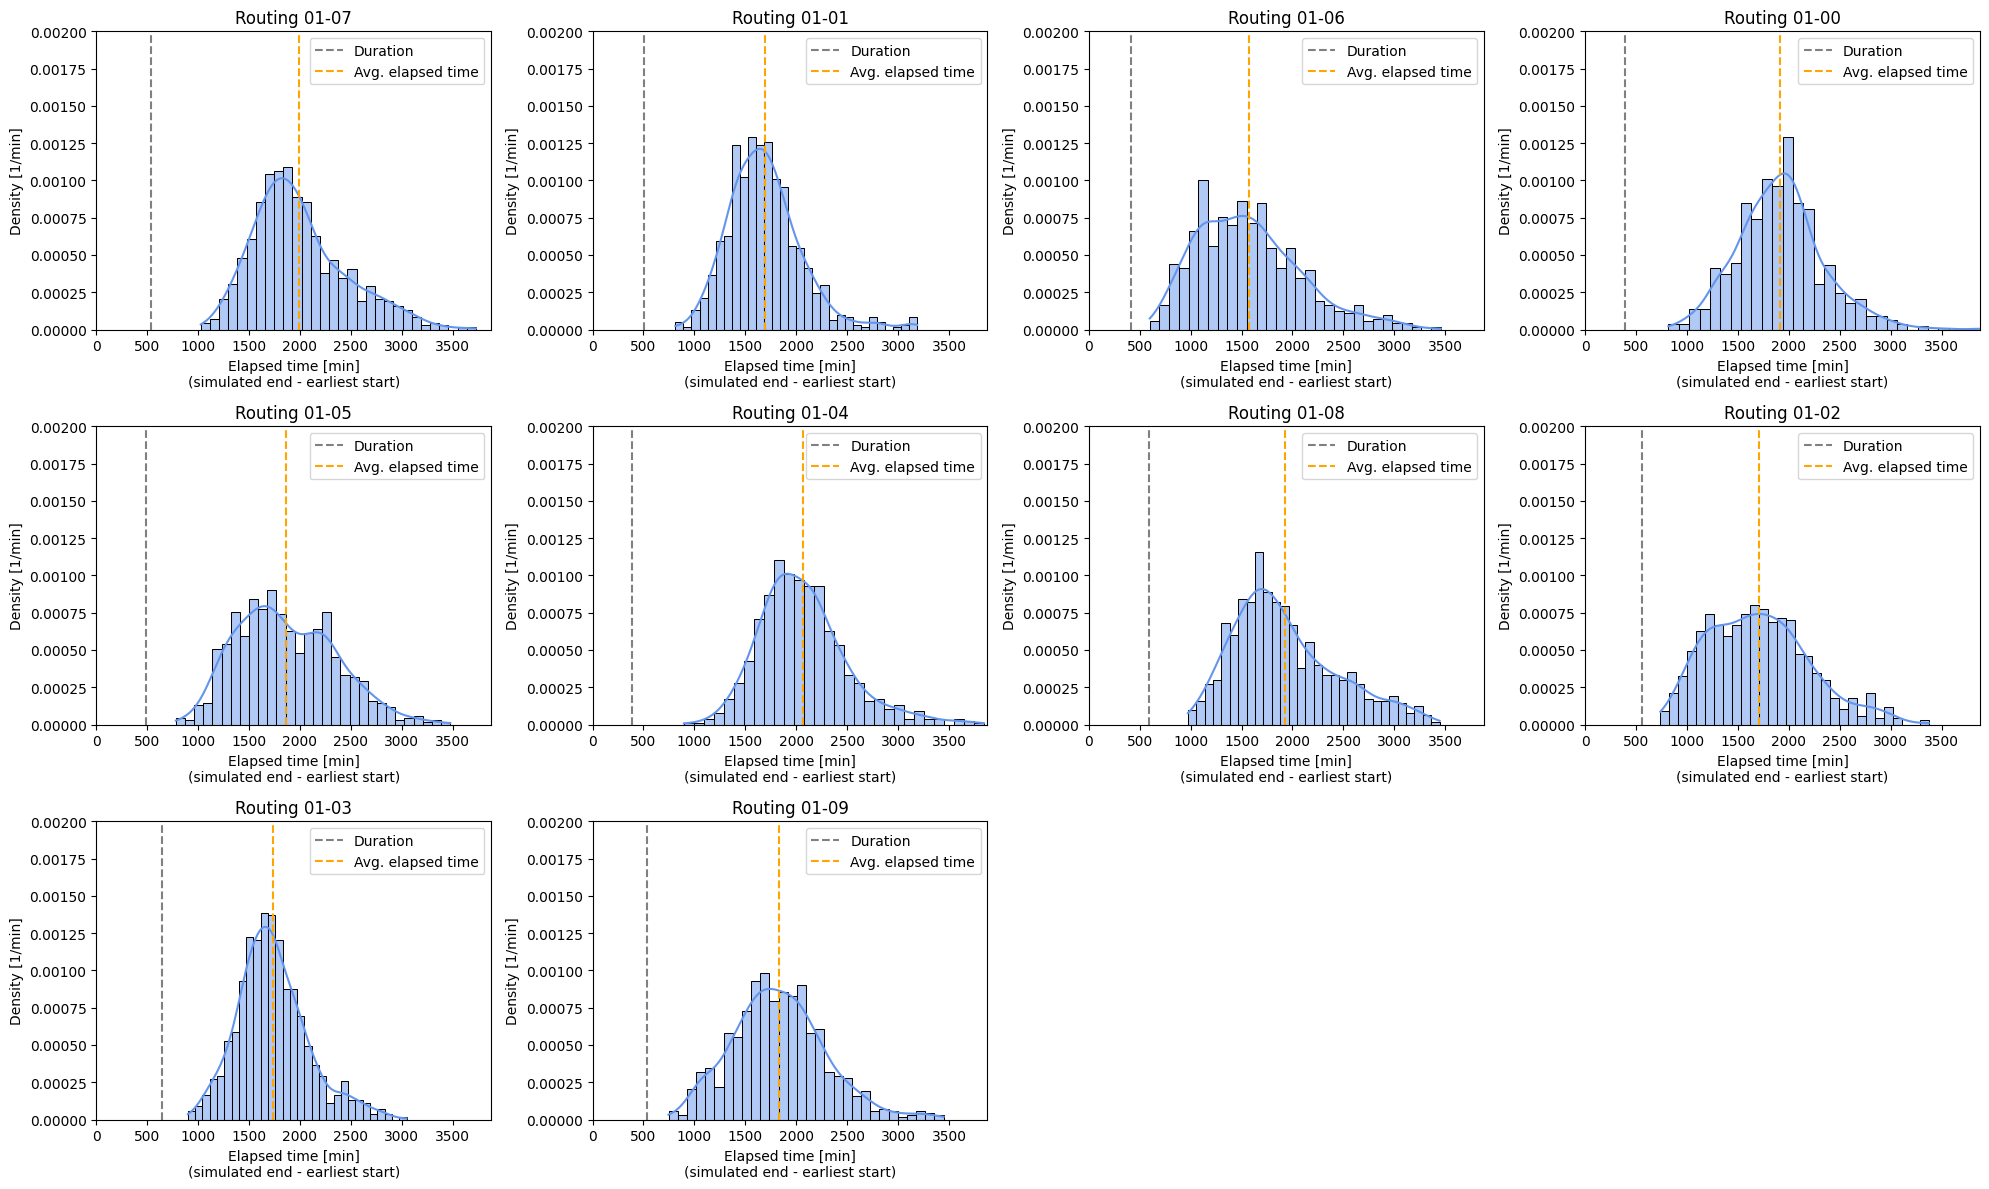

In [10]:
#DataFramePlotGenerator.get_scheduling_window_density_plot_figure(df_jobs_times_temp, due_date_column="End", y_max=0.0015)
DataFramePlotGenerator.get_elapsed_time_density_plot_figure(df_jobs_times_temp)
plt.show()

## B) Generation of deadlines using log-normal distribution

In [11]:
df_jobs_times = DataFrameEnrichment.add_groupwise_lognormal_due_dates_by_group_mean(df_jobs_times_temp, sigma=0.25)
df_jobs_times

,Job,Routing_ID,Last Operation,End,Arrival,Ready Time,Due Date,Total Processing Time,Flowtime,Lateness,Tardiness,Earliness
0,01-08500-0000,01-07,9,2916,0,1440,2725.0,549,1476,170,170,0
1,01-08500-0002,01-01,9,2648,125,1440,2814.0,509,1208,-188,0,188
2,01-08500-0001,01-06,9,2225,53,1440,2745.0,436,785,-535,0,535
3,01-08500-0006,01-00,9,2548,753,1440,3545.0,406,1108,-1023,0,1023
4,01-08500-0003,01-05,9,2906,174,1440,3863.0,486,1466,-1005,0,1005
5,01-08500-0004,01-04,9,3026,219,1440,3606.0,381,1586,-602,0,602
6,01-08500-0009,01-08,9,2917,979,1440,3375.0,565,1477,-485,0,485
7,01-08500-0013,01-04,9,3081,1178,1440,3281.0,384,1641,-219,0,219
8,01-08500-0005,01-02,9,2506,443,1440,3154.0,533,1066,-663,0,663
9,01-08500-0012,01-08,9,3149,1084,1440,2982.0,606,1709,146,146,0


####  Plot of the new deadlines

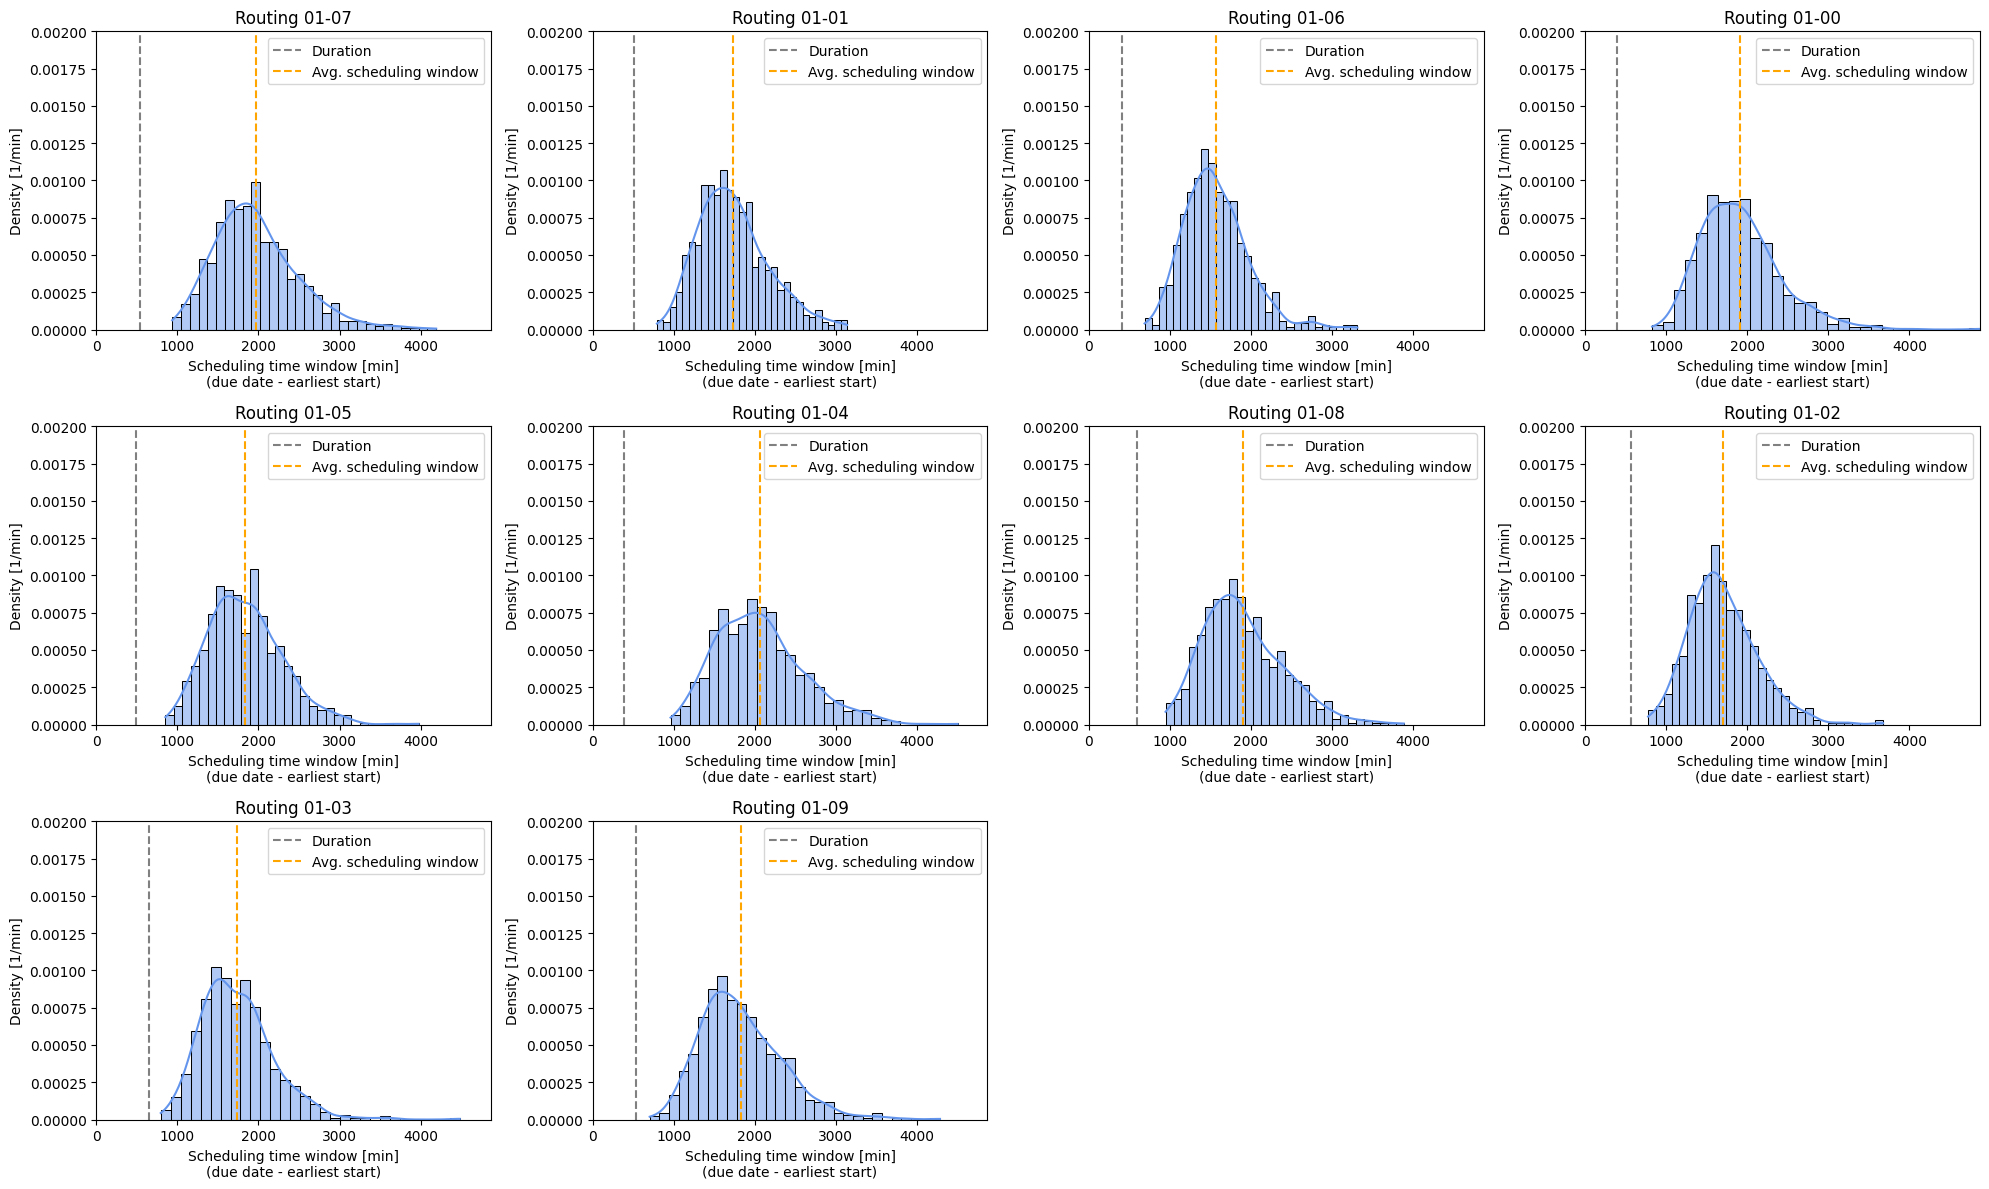

In [12]:
#DataFramePlotGenerator.get_scheduling_window_density_plot_figure(df_jobs_times, y_max=0.0015)
DataFramePlotGenerator.get_scheduling_window_density_plot_figure(df_jobs_times)
plt.show()

#### Ensuring that the processing time is achievable to a certain extent in the best-case scenario

In [13]:
# min. 100 % of processing time for each job is covered in best-case
df_jobs_times_final = DataFrameEnrichment.ensure_reasonable_due_dates(df_jobs_times, min_coverage = 1.0)

diff_count = (df_jobs_times_final["Due Date"] > df_jobs_times["Due Date"]).sum()

# Info: Compare the "Due Date" column
print(f"Number of different entries in 'Due Date': {diff_count}")

df_jobs_times_final

Number of different entries in 'Due Date': 0


,Job,Routing_ID,Last Operation,Arrival,Ready Time,Due Date,Total Processing Time,Flowtime,Lateness,Tardiness,Earliness
0,01-08500-0000,01-07,9,0,1440,2725,549,1476,170,170,0
1,01-08500-0002,01-01,9,125,1440,2814,509,1208,-188,0,188
2,01-08500-0001,01-06,9,53,1440,2745,436,785,-535,0,535
3,01-08500-0006,01-00,9,753,1440,3545,406,1108,-1023,0,1023
4,01-08500-0003,01-05,9,174,1440,3863,486,1466,-1005,0,1005
5,01-08500-0004,01-04,9,219,1440,3606,381,1586,-602,0,602
6,01-08500-0009,01-08,9,979,1440,3375,565,1477,-485,0,485
7,01-08500-0013,01-04,9,1178,1440,3281,384,1641,-219,0,219
8,01-08500-0005,01-02,9,443,1440,3154,533,1066,-663,0,663
9,01-08500-0012,01-08,9,1084,1440,2982,606,1709,146,146,0


# II. Transition Times

In [14]:
df_fcfs

,Job,Routing_ID,Operation,Machine,Start,Processing Time,End,Arrival,Ready Time,Due Date
0,01-08500-0000,01-07,0,M02,1440,31,1471,0,1440,2746
1,01-08500-0000,01-07,1,M00,1694,81,1775,0,1440,2746
2,01-08500-0000,01-07,2,M01,2189,51,2240,0,1440,2746
3,01-08500-0000,01-07,3,M05,2240,72,2312,0,1440,2746
4,01-08500-0000,01-07,4,M04,2312,28,2340,0,1440,2746
5,01-08500-0000,01-07,5,M06,2467,92,2559,0,1440,2746
6,01-08500-0000,01-07,6,M08,2598,16,2614,0,1440,2746
7,01-08500-0000,01-07,7,M09,2614,56,2670,0,1440,2746
8,01-08500-0000,01-07,8,M07,2794,34,2828,0,1440,2746
9,01-08500-0000,01-07,9,M03,2828,88,2916,0,1440,2746


In [15]:
# noinspection PyProtectedMember
df_transition_times = DataFrameEnrichment._compute_transition_times_per_job_operation_backward(df_fcfs)
df_transition_times

,Job,Routing_ID,Operation,Machine,Start,Processing Time,End,Arrival,Ready Time,Due Date,End_Previous_Operation,Transition Time
9,01-08500-0000,01-07,9,M03,2828,88,2916,0,1440,2746,2828.0,0.0
8,01-08500-0000,01-07,8,M07,2794,34,2828,0,1440,2746,2670.0,124.0
7,01-08500-0000,01-07,7,M09,2614,56,2670,0,1440,2746,2614.0,0.0
6,01-08500-0000,01-07,6,M08,2598,16,2614,0,1440,2746,2559.0,39.0
5,01-08500-0000,01-07,5,M06,2467,92,2559,0,1440,2746,2340.0,127.0
4,01-08500-0000,01-07,4,M04,2312,28,2340,0,1440,2746,2312.0,0.0
3,01-08500-0000,01-07,3,M05,2240,72,2312,0,1440,2746,2240.0,0.0
2,01-08500-0000,01-07,2,M01,2189,51,2240,0,1440,2746,1775.0,414.0
1,01-08500-0000,01-07,1,M00,1694,81,1775,0,1440,2746,1471.0,223.0
0,01-08500-0000,01-07,0,M02,1440,31,1471,0,1440,2746,NaN,NaN


In [16]:
df_avg_transition_times = DataFrameEnrichment.compute_avg_transition_times_per_machine_backward(df_fcfs)
df_avg_transition_times

,Machine,Ø Transition Time
0,M00,227
1,M01,492
2,M02,127
3,M03,198
4,M04,59
5,M05,95
6,M06,54
7,M07,95
8,M08,70
9,M09,24


In [17]:
transitions_df = finished_operations.to_transition_time_dataframe()
transitions_df

,Job,Operation,Machine,Granted Time,End,Prev End,Transition Time
76366,01-08500-7641,6,M00,579572,579618,578490.0,1082.0
76511,01-08500-7651,1,M00,578450,578490,578450.0,0.0
76472,01-08500-7642,2,M00,578375,578450,578375.0,0.0
76501,01-08500-7650,1,M00,578363,578375,578363.0,0.0
76491,01-08500-7647,1,M00,578326,578363,578326.0,0.0
76206,01-08500-7632,6,M00,578284,578326,578284.0,0.0
76481,01-08500-7643,1,M00,578202,578284,578170.0,32.0
76432,01-08500-7633,2,M00,578106,578170,578106.0,0.0
76461,01-08500-7640,1,M00,578093,578106,578093.0,0.0
76451,01-08500-7637,1,M00,578057,578093,578057.0,0.0


In [18]:
waiting_df = finished_operations.to_waiting_time_dataframe()
waiting_df

,Job,Operation,Machine,Request Time,Granted Time,Waiting Time
0,01-08500-0000,0,M02,1440,1440,0
1,01-08500-0000,1,M00,1471,1694,223
2,01-08500-0000,2,M01,1775,2189,414
3,01-08500-0000,3,M05,2240,2240,0
4,01-08500-0000,4,M04,2312,2312,0
5,01-08500-0000,5,M06,2340,2467,127
6,01-08500-0000,6,M08,2559,2598,39
7,01-08500-0000,7,M09,2614,2614,0
8,01-08500-0000,8,M07,2670,2794,124
9,01-08500-0000,9,M03,2828,2828,0


In [19]:
DataFrameEnrichment.aggregate_mean_per_group(
    transitions_df,
    group_column = "Machine",
    value_column = "Transition Time",
    new_column_name = "Ø Transition Time",
)

,Machine,Ø Transition Time
0,M00,27
1,M01,21
2,M02,20
3,M03,13
4,M04,23
5,M05,34
6,M06,27
7,M07,26
8,M08,23
9,M09,35


In [20]:
DataFrameEnrichment.aggregate_mean_per_group(
    waiting_df,
    group_column = "Machine",
    value_column = "Waiting Time",
    new_column_name = "Ø Waiting Time",
)

,Machine,Ø Waiting Time
0,M00,198
1,M01,407
2,M02,125
3,M03,198
4,M04,59
5,M05,95
6,M06,54
7,M07,95
8,M08,70
9,M09,24
